# GOLEM Fast Camera Data Visualization

This notebook demonstrates how to load and visualize fast camera data from the GOLEM tokamak using the `GolemDataLoader` module.

**Shot:** 47002  
**Camera:** Radial Fast Camera (80,000 fps)  
**Frame Format:** 1-pixel wide × 1280 pixels tall PNG images

## 1. Import Required Libraries

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from golem_data_loader import GolemDataLoader

# Set matplotlib style for better-looking plots
plt.style.use('default')
%matplotlib inline

## 2. Initialize GOLEM Data Loader

Load data for shot 47002, which has fast camera data available.

In [89]:
# Initialize loader for shot 47002
shot_number = 47002
loader = GolemDataLoader(shot_number)

# Check available diagnostics
available = loader.get_available_diagnostics()
print(f"Shot {shot_number} - Available Diagnostics:")
for diagnostic, is_available in available.items():
    status = "✓" if is_available else "✗"
    print(f"  {status} {diagnostic}")

Shot 47002 - Available Diagnostics:
  ✗ Hα
  ✗ C III + O II
  ✗ He I
  ✓ Whole
  ✓ MiniSpectrometer
  ✓ FastCamera_Radial
  ✓ FastCamera_Vertical


## 3. Load Fast Camera Data

Load the first 100 frames from the radial camera.

In [90]:
# Load fast camera data (limit to 100 frames for faster processing)
cameras = loader.load_fast_cameras(cameras=['radial'], max_frames=1200)

# Get the radial camera data
radial = cameras['radial']

# Display information about the data
print(f"Camera type: {radial.camera_type}")
print(f"Number of frames: {radial.frames.shape[0]}")
print(f"Frame dimensions: {radial.frames.shape[1:]} pixels")
print(f"Frame rate: {radial.frame_rate} fps")
print(f"Time per frame: {1/radial.frame_rate*1e6:.2f} μs")
print(f"Total duration: {radial.time[-1]*1000:.3f} ms")
print(f"Data type: {radial.frames.dtype}")

2025-11-14 20:49:55,243 - golem_data_loader.golem_data_loader - INFO - Loading Fast Camera (Radial) frames...
2025-11-14 20:49:55,261 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Radial) frame 1 from http://golem.fjfi.cvut.cz/shots/47002/Diagnostics/FastCameras/Camera_Radial/Frames/1.png
2025-11-14 20:49:55,277 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Radial) frame 2 from http://golem.fjfi.cvut.cz/shots/47002/Diagnostics/FastCameras/Camera_Radial/Frames/2.png
2025-11-14 20:49:55,291 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Radial) frame 3 from http://golem.fjfi.cvut.cz/shots/47002/Diagnostics/FastCameras/Camera_Radial/Frames/3.png
2025-11-14 20:49:55,302 - golem_data_loader.golem_data_loader - INFO - Successfully loaded Fast Camera (Radial) frame 4 from http://golem.fjfi.cvut.cz/shots/47002/Diagnostics/FastCameras/Camera_Radial/Frames/4.png
2025-11-14 20:49:55,315 - golem_da

Camera type: radial
Number of frames: 1200
Frame dimensions: (1280, 3) pixels
Frame rate: 80000.0 fps
Time per frame: 12.50 μs
Total duration: 14.988 ms
Data type: uint8


## 4. Display Single Camera Frame

Plot a single frame from the fast camera as a grayscale image.

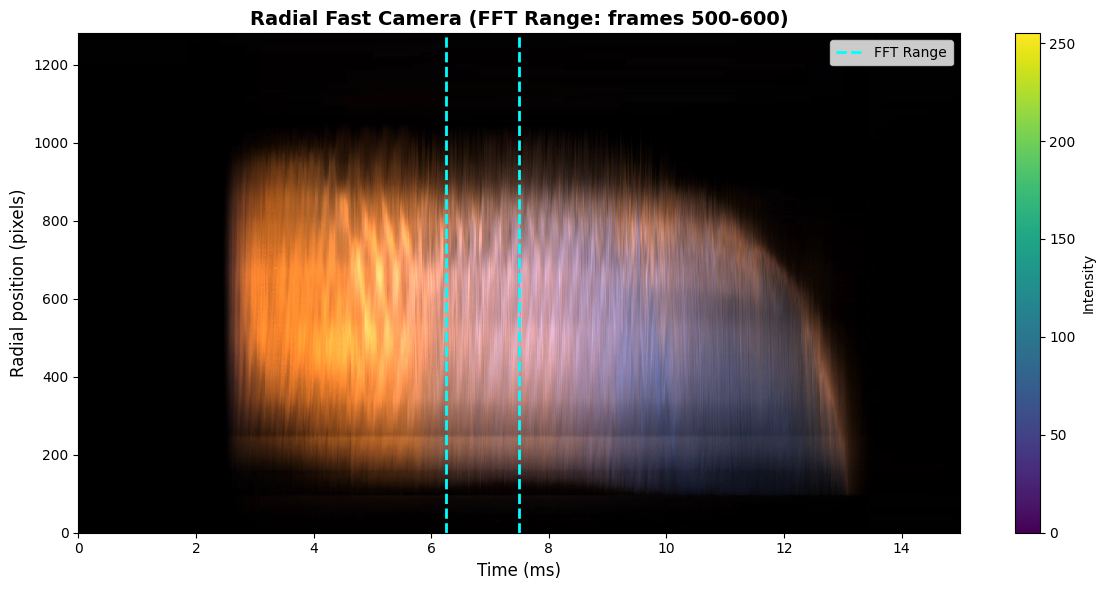

FFT will be computed on frames 500 to 600
Time range: 6.250 ms to 7.500 ms


In [91]:
fft_range = (500, 600)

# Create figure
fig, ax = plt.subplots(figsize=(12, 6))

# Display the frame - keep it 2D by transposing without squeeze for proper visualization
# Frame is (1, 1280), transpose to (1280, 1) for vertical display
im = ax.imshow(np.transpose(radial.frames, axes=(1,0,2)), aspect='auto', interpolation='nearest', extent=(radial.time[0]*1e3, radial.time[-1]*1e3,0, radial.frames.shape[1]))

# Add colorbar
cbar = plt.colorbar(im, ax=ax, label='Intensity')

# Highlight the FFT range
ax.axvline(radial.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, label='FFT Range')
ax.axvline(radial.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2)
ax.legend(loc='upper right')

# Labels and title
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Radial position (pixels)', fontsize=12)
ax.set_title(f'Radial Fast Camera (FFT Range: frames {fft_range[0]}-{fft_range[1]})', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"FFT will be computed on frames {fft_range[0]} to {fft_range[1]}")
print(f"Time range: {radial.time[fft_range[0]]*1e3:.3f} ms to {radial.time[fft_range[1]]*1e3:.3f} ms")


## 5. Display Individual Color Channels

Separate and visualize the Red, Green, and Blue channels from the fast camera data.

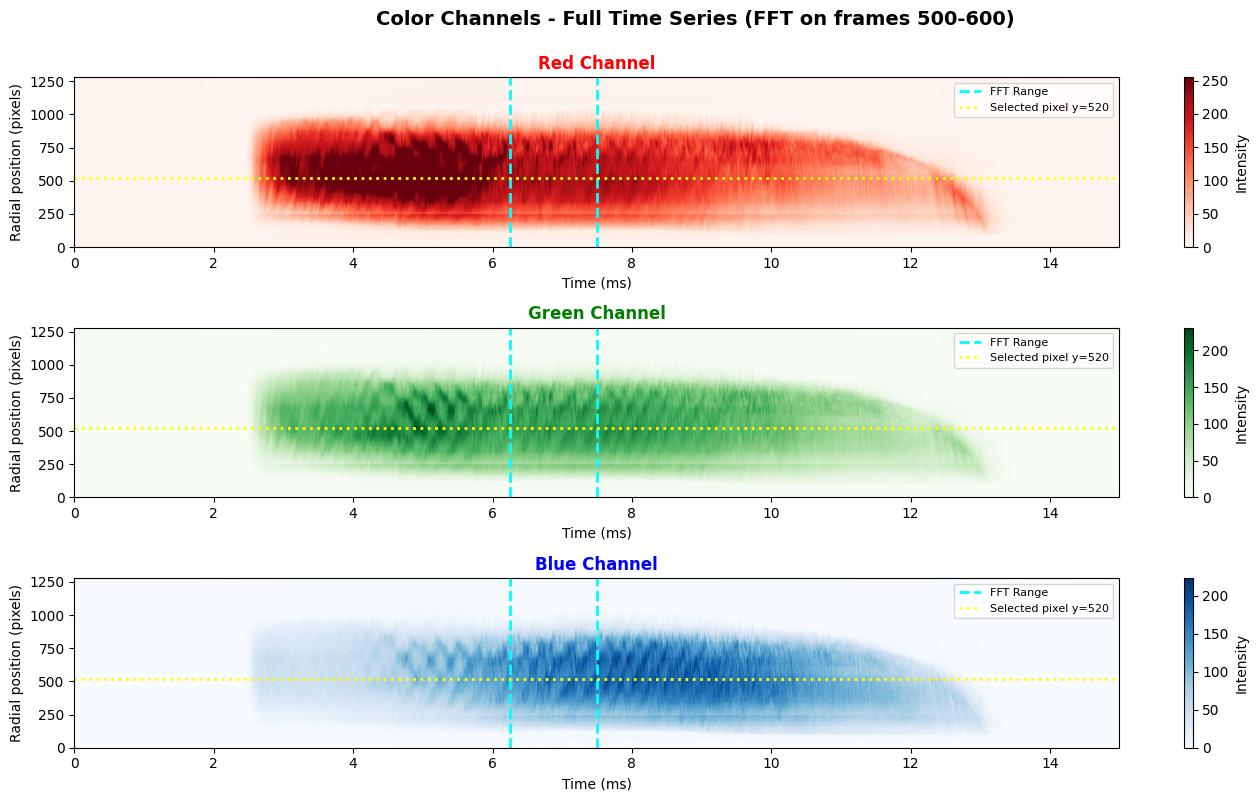

Time Series Statistics for pixel y=520 in FFT range (frames 500-600):

Red Channel:
  Min: 142, Max: 255, Mean: 186.94

Green Channel:
  Min: 102, Max: 179, Mean: 134.75

Blue Channel:
  Min: 85, Max: 172, Mean: 126.24


In [116]:
# Select a specific pixel position (y-coordinate) to analyze over time
pixel_y = 520  # Middle of the 1280 pixel height

# Extract the time series for this pixel position across all frames
# Shape: (num_frames, 3) where 3 is RGB channels
time_series_red = radial.frames[:, pixel_y, 0]
time_series_green = radial.frames[:, pixel_y, 1]
time_series_blue = radial.frames[:, pixel_y, 2]

# Create a figure to show the time series
fig, axes = plt.subplots(3, 1, figsize=(14, 8))

# Red channel time series
im0 = axes[0].imshow(np.transpose(radial.frames, axes=(1,0,2))[:,:,0], aspect='auto', interpolation='nearest', 
                     extent=(radial.time[0]*1e3, radial.time[-1]*1e3, 0, radial.frames.shape[1]), cmap='Reds')
axes[0].axvline(radial.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, label='FFT Range')
axes[0].axvline(radial.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2)
axes[0].axhline(pixel_y, color='yellow', linestyle=':', linewidth=2, label=f'Selected pixel y={pixel_y}')
axes[0].set_title(f'Red Channel', fontsize=12, fontweight='bold', color='red')
axes[0].set_xlabel('Time (ms)', fontsize=10)
axes[0].set_ylabel('Radial position (pixels)', fontsize=10)
axes[0].legend(loc='upper right', fontsize=8)
plt.colorbar(im0, ax=axes[0], label='Intensity')

# Green channel time series
im1 = axes[1].imshow(np.transpose(radial.frames, axes=(1,0,2))[:,:,1], aspect='auto', interpolation='nearest',
                     extent=(radial.time[0]*1e3, radial.time[-1]*1e3, 0, radial.frames.shape[1]), cmap='Greens')
axes[1].axvline(radial.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, label='FFT Range')
axes[1].axvline(radial.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2)
axes[1].axhline(pixel_y, color='yellow', linestyle=':', linewidth=2, label=f'Selected pixel y={pixel_y}')
axes[1].set_title(f'Green Channel', fontsize=12, fontweight='bold', color='green')
axes[1].set_xlabel('Time (ms)', fontsize=10)
axes[1].set_ylabel('Radial position (pixels)', fontsize=10)
axes[1].legend(loc='upper right', fontsize=8)
plt.colorbar(im1, ax=axes[1], label='Intensity')

# Blue channel time series
im2 = axes[2].imshow(np.transpose(radial.frames, axes=(1,0,2))[:,:,2], aspect='auto', interpolation='nearest',
                     extent=(radial.time[0]*1e3, radial.time[-1]*1e3, 0, radial.frames.shape[1]), cmap='Blues')
axes[2].axvline(radial.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, label='FFT Range')
axes[2].axvline(radial.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2)
axes[2].axhline(pixel_y, color='yellow', linestyle=':', linewidth=2, label=f'Selected pixel y={pixel_y}')
axes[2].set_title(f'Blue Channel', fontsize=12, fontweight='bold', color='blue')
axes[2].set_xlabel('Time (ms)', fontsize=10)
axes[2].set_ylabel('Radial position (pixels)', fontsize=10)
axes[2].legend(loc='upper right', fontsize=8)
plt.colorbar(im2, ax=axes[2], label='Intensity')

plt.suptitle(f'Color Channels - Full Time Series (FFT on frames {fft_range[0]}-{fft_range[1]})', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Print statistics for each channel in the FFT range
print(f"Time Series Statistics for pixel y={pixel_y} in FFT range (frames {fft_range[0]}-{fft_range[1]}):")
print(f"\nRed Channel:")
print(f"  Min: {time_series_red[fft_range[0]:fft_range[1]].min()}, Max: {time_series_red[fft_range[0]:fft_range[1]].max()}, Mean: {time_series_red[fft_range[0]:fft_range[1]].mean():.2f}")
print(f"\nGreen Channel:")
print(f"  Min: {time_series_green[fft_range[0]:fft_range[1]].min()}, Max: {time_series_green[fft_range[0]:fft_range[1]].max()}, Mean: {time_series_green[fft_range[0]:fft_range[1]].mean():.2f}")
print(f"\nBlue Channel:")
print(f"  Min: {time_series_blue[fft_range[0]:fft_range[1]].min()}, Max: {time_series_blue[fft_range[0]:fft_range[1]].max()}, Mean: {time_series_blue[fft_range[0]:fft_range[1]].mean():.2f}")


## 6. Fourier Transform Analysis of Color Channels

Compute and visualize the 1D Fourier transform for each color channel to analyze frequency content.

In [117]:
# Compute 1D FFT for each color channel along the time axis using fft_range
fft_red = np.fft.fft(time_series_red[fft_range[0]:fft_range[1]])
fft_green = np.fft.fft(time_series_green[fft_range[0]:fft_range[1]])
fft_blue = np.fft.fft(time_series_blue[fft_range[0]:fft_range[1]])

# Compute magnitude spectrum (absolute value)
magnitude_red = np.abs(fft_red)
magnitude_green = np.abs(fft_green)
magnitude_blue = np.abs(fft_blue)

# Compute power spectrum (magnitude squared)
power_red = magnitude_red**2
power_green = magnitude_green**2
power_blue = magnitude_blue**2

# Create frequency axis (temporal frequencies)
n_frames = fft_range[1] - fft_range[0]
dt = 1 / radial.frame_rate  # Time between frames in seconds
freq = np.fft.fftfreq(n_frames, dt)  # Frequencies in Hz

# Only plot positive frequencies (due to symmetry)
pos_freq_idx = freq >= 0
freq_pos = freq[pos_freq_idx]

print(f"FFT Analysis Results:")
print(f"  FFT frame range: {fft_range[0]} to {fft_range[1]}")
print(f"  Number of frames: {n_frames}")
print(f"  Time range: {radial.time[fft_range[0]]*1e3:.3f} to {radial.time[fft_range[1]]*1e3:.3f} ms")
print(f"  Duration: {(radial.time[fft_range[1]] - radial.time[fft_range[0]])*1e3:.3f} ms")
print(f"  Frame rate: {radial.frame_rate} fps")
print(f"  Time step (dt): {dt*1e6:.2f} μs")
print(f"  Frequency resolution: {freq[1] - freq[0]:.2f} Hz")
print(f"  Maximum frequency (Nyquist): {freq_pos.max()/1000:.2f} kHz")


FFT Analysis Results:
  FFT frame range: 500 to 600
  Number of frames: 100
  Time range: 6.250 to 7.500 ms
  Duration: 1.250 ms
  Frame rate: 80000.0 fps
  Time step (dt): 12.50 μs
  Frequency resolution: 800.00 Hz
  Maximum frequency (Nyquist): 39.20 kHz


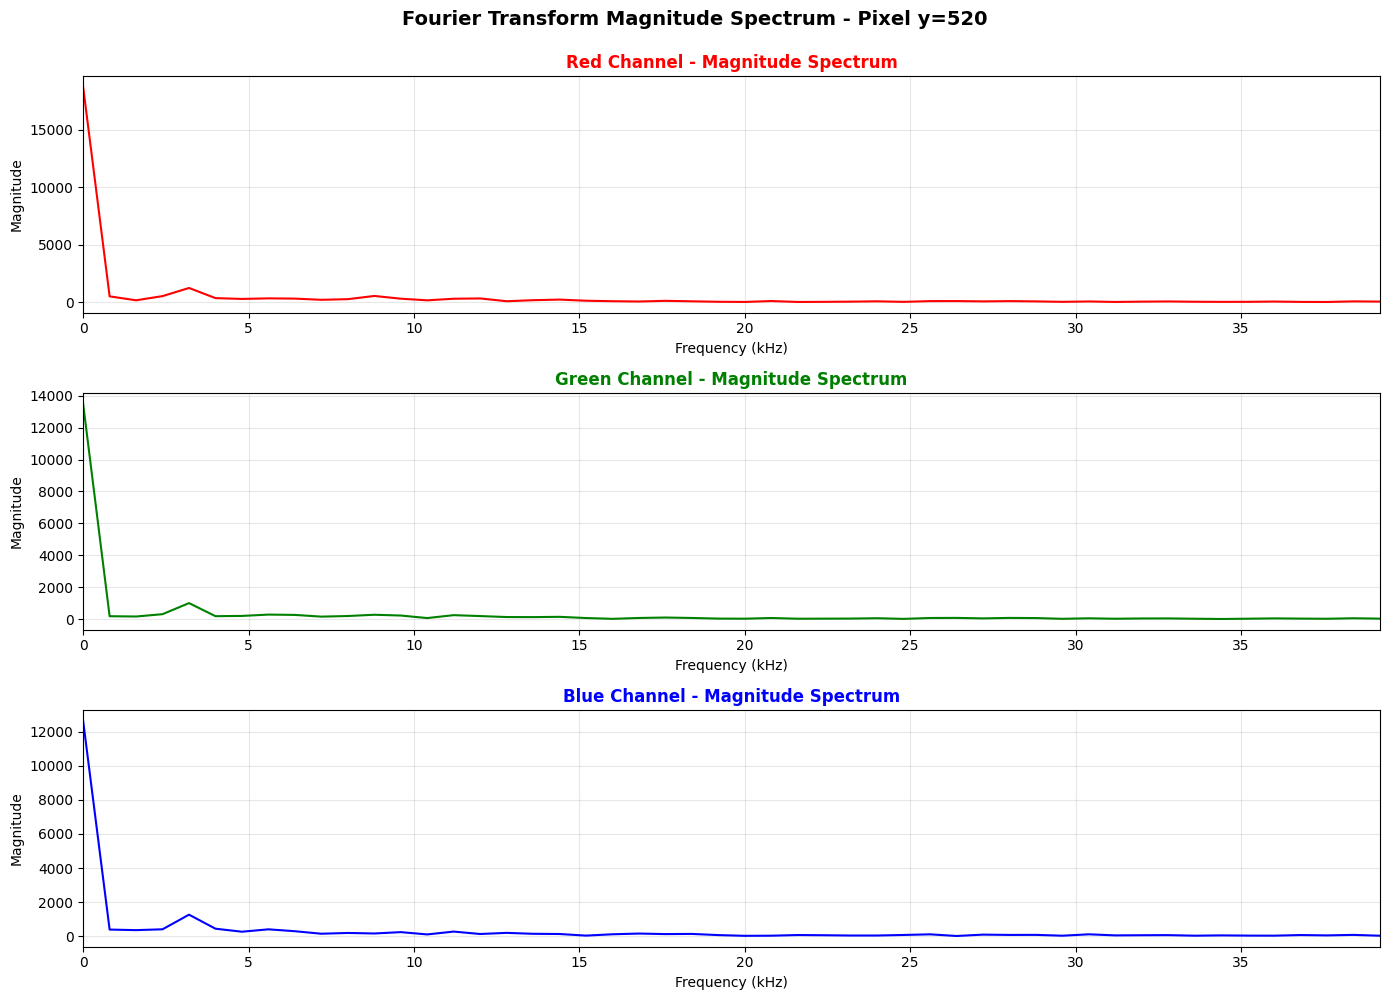

In [118]:
# Plot the magnitude spectrum for each channel
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Red channel magnitude spectrum
axes[0].plot(freq_pos/1000, magnitude_red[pos_freq_idx], color='red', linewidth=1.5)
axes[0].set_title('Red Channel - Magnitude Spectrum', fontsize=12, fontweight='bold', color='red')
axes[0].set_xlabel('Frequency (kHz)', fontsize=10)
axes[0].set_ylabel('Magnitude', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, freq_pos.max()/1000)

# Green channel magnitude spectrum
axes[1].plot(freq_pos/1000, magnitude_green[pos_freq_idx], color='green', linewidth=1.5)
axes[1].set_title('Green Channel - Magnitude Spectrum', fontsize=12, fontweight='bold', color='green')
axes[1].set_xlabel('Frequency (kHz)', fontsize=10)
axes[1].set_ylabel('Magnitude', fontsize=10)
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(0, freq_pos.max()/1000)

# Blue channel magnitude spectrum
axes[2].plot(freq_pos/1000, magnitude_blue[pos_freq_idx], color='blue', linewidth=1.5)
axes[2].set_title('Blue Channel - Magnitude Spectrum', fontsize=12, fontweight='bold', color='blue')
axes[2].set_xlabel('Frequency (kHz)', fontsize=10)
axes[2].set_ylabel('Magnitude', fontsize=10)
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(0, freq_pos.max()/1000)

plt.suptitle(f'Fourier Transform Magnitude Spectrum - Pixel y={pixel_y}', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


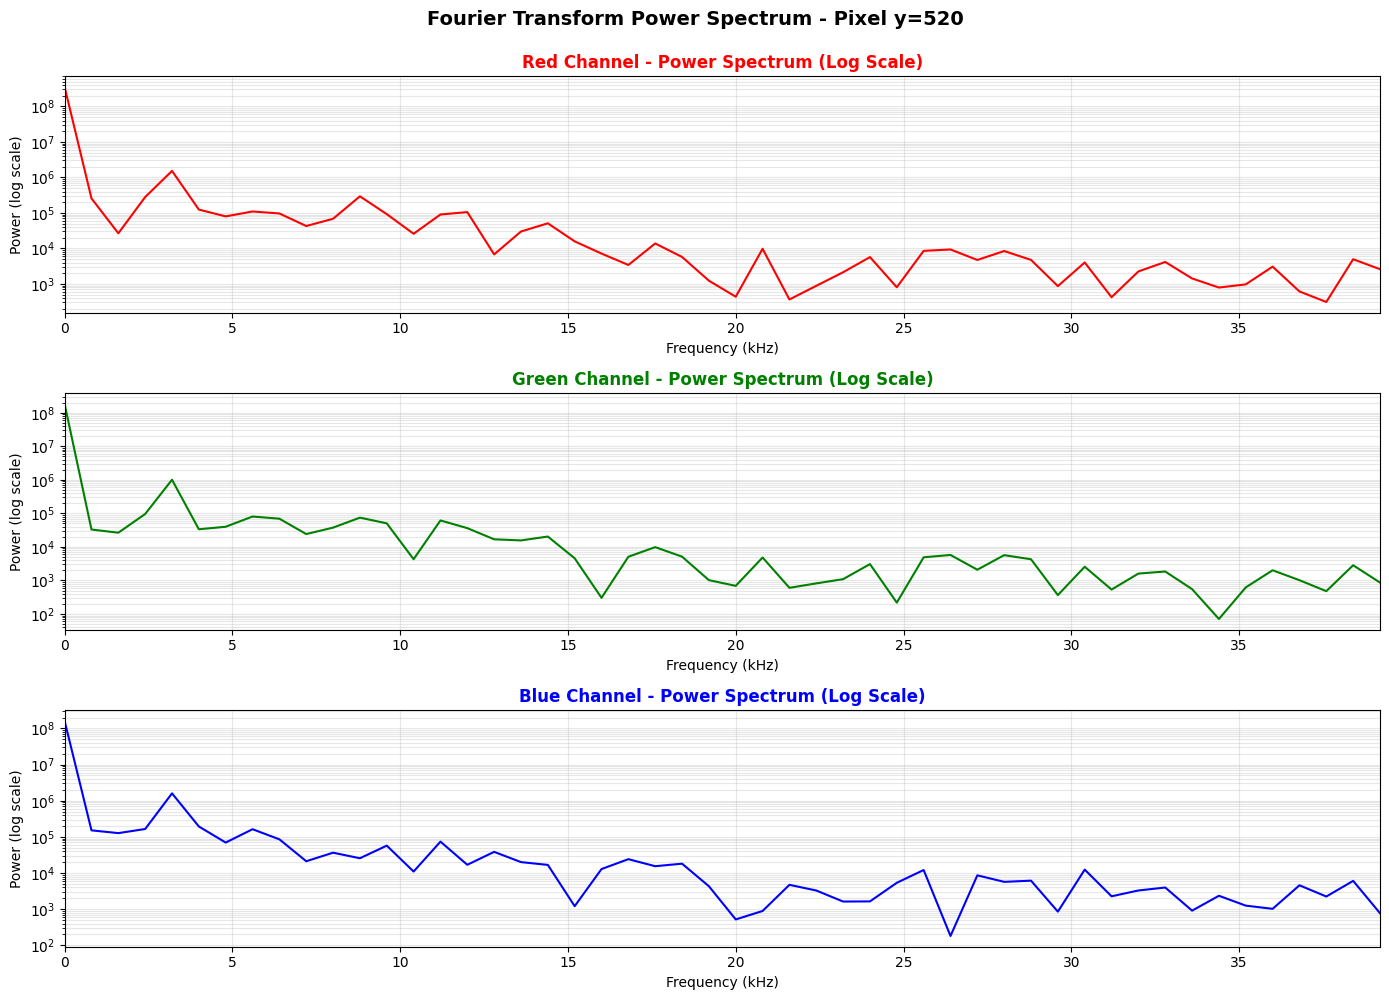

In [119]:
# Plot the power spectrum (log scale for better visualization)
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Red channel power spectrum
axes[0].semilogy(freq_pos/1000, power_red[pos_freq_idx], color='red', linewidth=1.5)
axes[0].set_title('Red Channel - Power Spectrum (Log Scale)', fontsize=12, fontweight='bold', color='red')
axes[0].set_xlabel('Frequency (kHz)', fontsize=10)
axes[0].set_ylabel('Power (log scale)', fontsize=10)
axes[0].grid(True, alpha=0.3, which='both')
axes[0].set_xlim(0, freq_pos.max()/1000)

# Green channel power spectrum
axes[1].semilogy(freq_pos/1000, power_green[pos_freq_idx], color='green', linewidth=1.5)
axes[1].set_title('Green Channel - Power Spectrum (Log Scale)', fontsize=12, fontweight='bold', color='green')
axes[1].set_xlabel('Frequency (kHz)', fontsize=10)
axes[1].set_ylabel('Power (log scale)', fontsize=10)
axes[1].grid(True, alpha=0.3, which='both')
axes[1].set_xlim(0, freq_pos.max()/1000)

# Blue channel power spectrum
axes[2].semilogy(freq_pos/1000, power_blue[pos_freq_idx], color='blue', linewidth=1.5)
axes[2].set_title('Blue Channel - Power Spectrum (Log Scale)', fontsize=12, fontweight='bold', color='blue')
axes[2].set_xlabel('Frequency (kHz)', fontsize=10)
axes[2].set_ylabel('Power (log scale)', fontsize=10)
axes[2].grid(True, alpha=0.3, which='both')
axes[2].set_xlim(0, freq_pos.max()/1000)

plt.suptitle(f'Fourier Transform Power Spectrum - Pixel y={pixel_y}', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


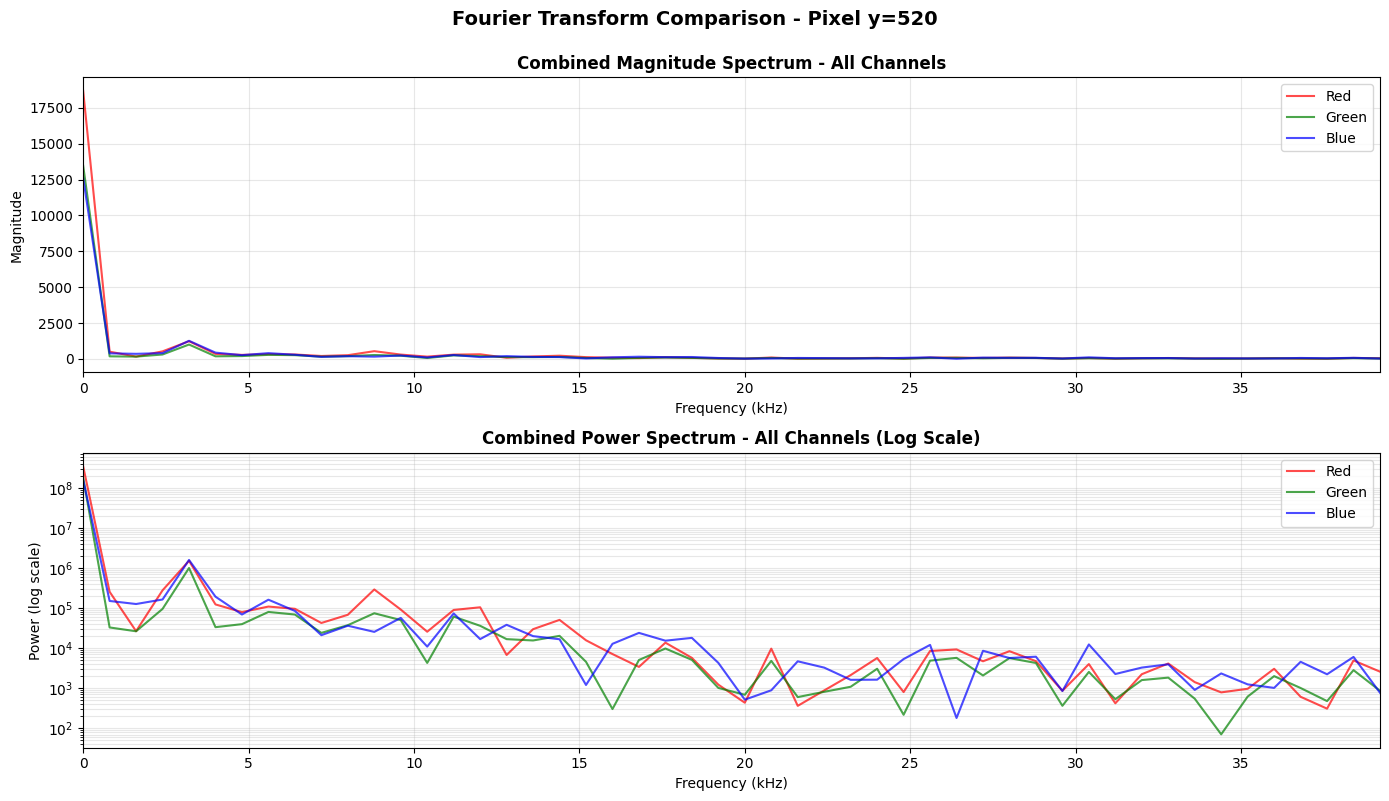


Dominant Frequency Analysis (excluding DC component):

Red Channel:
  Dominant frequency: 3.20 kHz
  Magnitude at dominant frequency: 1234.44

Green Channel:
  Dominant frequency: 3.20 kHz
  Magnitude at dominant frequency: 1002.90

Blue Channel:
  Dominant frequency: 3.20 kHz
  Magnitude at dominant frequency: 1264.02


In [120]:
# Compare all three channels on a single plot
fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Combined magnitude spectrum
axes[0].plot(freq_pos/1000, magnitude_red[pos_freq_idx], color='red', linewidth=1.5, label='Red', alpha=0.7)
axes[0].plot(freq_pos/1000, magnitude_green[pos_freq_idx], color='green', linewidth=1.5, label='Green', alpha=0.7)
axes[0].plot(freq_pos/1000, magnitude_blue[pos_freq_idx], color='blue', linewidth=1.5, label='Blue', alpha=0.7)
axes[0].set_title('Combined Magnitude Spectrum - All Channels', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Frequency (kHz)', fontsize=10)
axes[0].set_ylabel('Magnitude', fontsize=10)
axes[0].legend(loc='upper right', fontsize=10)
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(0, freq_pos.max()/1000)

# Combined power spectrum (log scale)
axes[1].semilogy(freq_pos/1000, power_red[pos_freq_idx], color='red', linewidth=1.5, label='Red', alpha=0.7)
axes[1].semilogy(freq_pos/1000, power_green[pos_freq_idx], color='green', linewidth=1.5, label='Green', alpha=0.7)
axes[1].semilogy(freq_pos/1000, power_blue[pos_freq_idx], color='blue', linewidth=1.5, label='Blue', alpha=0.7)
axes[1].set_title('Combined Power Spectrum - All Channels (Log Scale)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Frequency (kHz)', fontsize=10)
axes[1].set_ylabel('Power (log scale)', fontsize=10)
axes[1].legend(loc='upper right', fontsize=10)
axes[1].grid(True, alpha=0.3, which='both')
axes[1].set_xlim(0, freq_pos.max()/1000)

plt.suptitle(f'Fourier Transform Comparison - Pixel y={pixel_y}', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# Print dominant frequency information
print(f"\nDominant Frequency Analysis (excluding DC component):")
print(f"\nRed Channel:")
dominant_idx_red = np.argmax(magnitude_red[1:pos_freq_idx.sum()]) + 1  # Skip DC component
print(f"  Dominant frequency: {freq_pos[dominant_idx_red]/1000:.2f} kHz")
print(f"  Magnitude at dominant frequency: {magnitude_red[dominant_idx_red]:.2f}")

print(f"\nGreen Channel:")
dominant_idx_green = np.argmax(magnitude_green[1:pos_freq_idx.sum()]) + 1
print(f"  Dominant frequency: {freq_pos[dominant_idx_green]/1000:.2f} kHz")
print(f"  Magnitude at dominant frequency: {magnitude_green[dominant_idx_green]:.2f}")

print(f"\nBlue Channel:")
dominant_idx_blue = np.argmax(magnitude_blue[1:pos_freq_idx.sum()]) + 1
print(f"  Dominant frequency: {freq_pos[dominant_idx_blue]/1000:.2f} kHz")
print(f"  Magnitude at dominant frequency: {magnitude_blue[dominant_idx_blue]:.2f}")


## 7. Spectrogram Analysis

Create spectrograms to visualize how the frequency content changes over time for each color channel.

In [121]:
from scipy import signal

# Spectrogram parameters
nperseg = 128  # Length of each segment for STFT
noverlap = 120  # Overlap between segments

# Compute spectrograms for each color channel at pixel_y
f_red, t_red, Sxx_red = signal.spectrogram(
    time_series_red, 
    fs=radial.frame_rate,
    nperseg=nperseg,
    noverlap=noverlap,
    scaling='density'
)

f_green, t_green, Sxx_green = signal.spectrogram(
    time_series_green,
    fs=radial.frame_rate,
    nperseg=nperseg,
    noverlap=noverlap,
    scaling='density'
)

f_blue, t_blue, Sxx_blue = signal.spectrogram(
    time_series_blue,
    fs=radial.frame_rate,
    nperseg=nperseg,
    noverlap=noverlap,
    scaling='density'
)

print(f"Spectrogram Analysis Parameters:")
print(f"  Pixel position: y={pixel_y}")
print(f"  Segment length: {nperseg} frames ({nperseg/radial.frame_rate*1e3:.3f} ms)")
print(f"  Segment overlap: {noverlap} frames")
print(f"  Frequency bins: {len(f_red)}")
print(f"  Time bins: {len(t_red)}")
print(f"  Frequency range: 0 to {f_red[-1]/1000:.2f} kHz")
print(f"  Time range: 0 to {t_red[-1]*1000:.3f} ms")


Spectrogram Analysis Parameters:
  Pixel position: y=520
  Segment length: 128 frames (1.600 ms)
  Segment overlap: 120 frames
  Frequency bins: 65
  Time bins: 135
  Frequency range: 0 to 40.00 kHz
  Time range: 0 to 14.200 ms


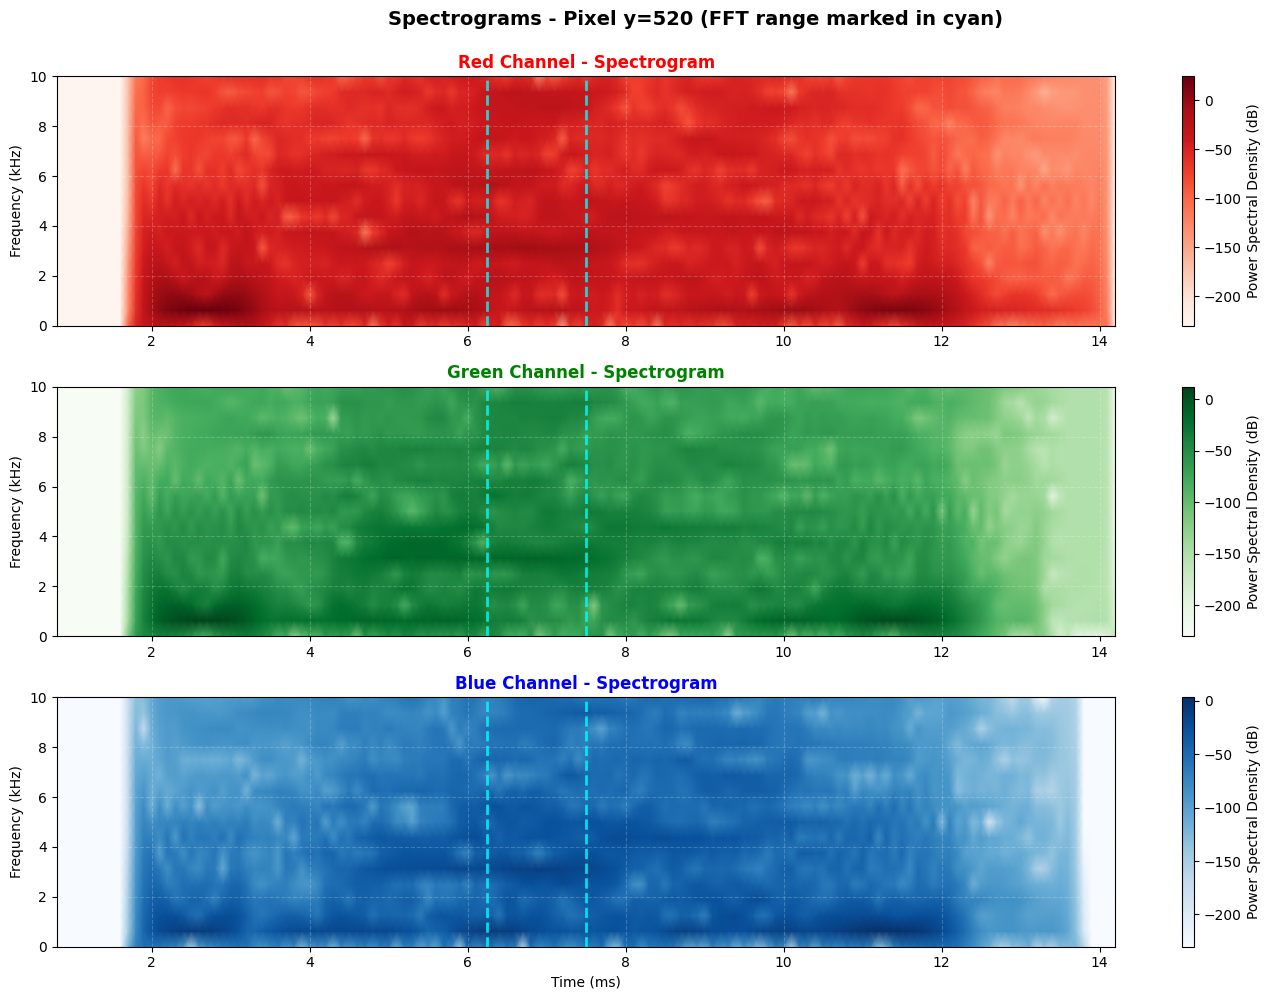

In [127]:
# Plot spectrograms for each color channel
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Red channel spectrogram
im0 = axes[0].pcolormesh(t_red*1000, f_red/1000, 10*np.log(Sxx_red + 1e-10), 
                         shading='gouraud', cmap='Reds')
axes[0].set_title('Red Channel - Spectrogram', fontsize=12, fontweight='bold', color='red')
axes[0].set_ylabel('Frequency (kHz)', fontsize=10)
axes[0].set_ylim(0, 10)  # Focus on 0-10 kHz
axes[0].grid(True, alpha=0.2, color='white', linestyle='--')
# Highlight FFT range
axes[0].axvline(radial.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, alpha=0.8)
axes[0].axvline(radial.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2, alpha=0.8)
cbar0 = plt.colorbar(im0, ax=axes[0], label='Power Spectral Density (dB)')

# Green channel spectrogram
im1 = axes[1].pcolormesh(t_green*1000, f_green/1000, 10*np.log(Sxx_green + 1e-10),
                         shading='gouraud', cmap='Greens')
axes[1].set_title('Green Channel - Spectrogram', fontsize=12, fontweight='bold', color='green')
axes[1].set_ylabel('Frequency (kHz)', fontsize=10)
axes[1].set_ylim(0, 10)
axes[1].grid(True, alpha=0.2, color='white', linestyle='--')
axes[1].axvline(radial.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, alpha=0.8)
axes[1].axvline(radial.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2, alpha=0.8)
cbar1 = plt.colorbar(im1, ax=axes[1], label='Power Spectral Density (dB)')

# Blue channel spectrogram
im2 = axes[2].pcolormesh(t_blue*1000, f_blue/1000, 10*np.log(Sxx_blue + 1e-10),
                         shading='gouraud', cmap='Blues')
axes[2].set_title('Blue Channel - Spectrogram', fontsize=12, fontweight='bold', color='blue')
axes[2].set_xlabel('Time (ms)', fontsize=10)
axes[2].set_ylabel('Frequency (kHz)', fontsize=10)
axes[2].set_ylim(0, 10)
axes[2].grid(True, alpha=0.2, color='white', linestyle='--')
axes[2].axvline(radial.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, alpha=0.8)
axes[2].axvline(radial.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2, alpha=0.8)
cbar2 = plt.colorbar(im2, ax=axes[2], label='Power Spectral Density (dB)')

plt.suptitle(f'Spectrograms - Pixel y={pixel_y} (FFT range marked in cyan)', 
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


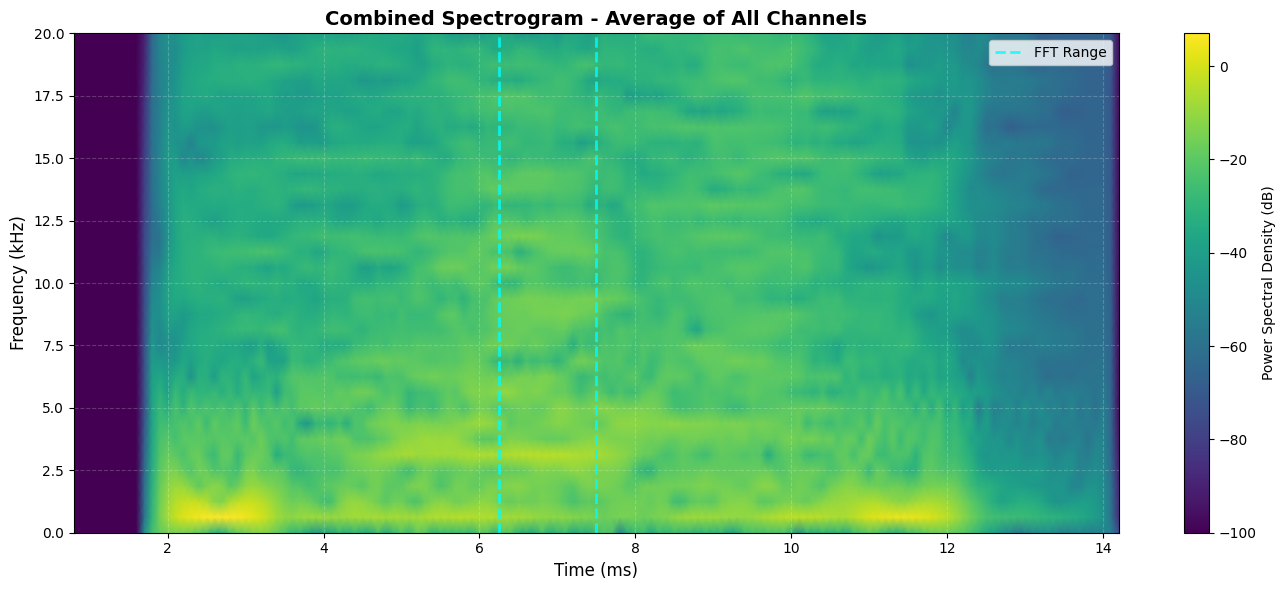


Spectrogram shows time-frequency evolution at pixel y=520
Brighter colors indicate higher power at that frequency and time.


In [123]:
# Create a combined spectrogram comparison
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# Average the three channels for a combined view
Sxx_combined = (Sxx_red + Sxx_green + Sxx_blue) / 3

im = ax.pcolormesh(t_red*1000, f_red/1000, 10*np.log10(Sxx_combined + 1e-10),
                   shading='gouraud', cmap='viridis')
ax.set_title('Combined Spectrogram - Average of All Channels', fontsize=14, fontweight='bold')
ax.set_xlabel('Time (ms)', fontsize=12)
ax.set_ylabel('Frequency (kHz)', fontsize=12)
ax.set_ylim(0, 20)  # Focus on 0-20 kHz
ax.grid(True, alpha=0.2, color='white', linestyle='--')

# Highlight FFT range
ax.axvline(radial.time[fft_range[0]]*1e3, color='cyan', linestyle='--', linewidth=2, 
           alpha=0.8, label='FFT Range')
ax.axvline(radial.time[fft_range[1]]*1e3, color='cyan', linestyle='--', linewidth=2, alpha=0.8)
ax.legend(loc='upper right', fontsize=10)

cbar = plt.colorbar(im, ax=ax, label='Power Spectral Density (dB)')

plt.tight_layout()
plt.show()

print(f"\nSpectrogram shows time-frequency evolution at pixel y={pixel_y}")
print(f"Brighter colors indicate higher power at that frequency and time.")
